In [163]:
# Tensor Flow Syntax Basics

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


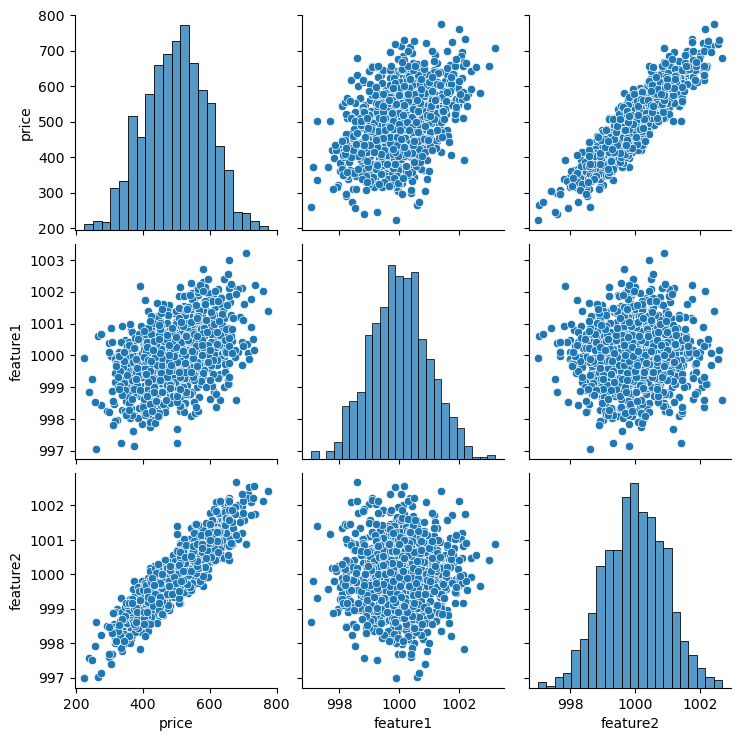

In [7]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
df.columns

Index(['price', 'feature1', 'feature2'], dtype='object')

In [17]:
x=df[['feature1', 'feature2']].values
y=df['price'].values

In [19]:
x

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
x_train.shape

(700, 2)

In [25]:
x_test.shape

(300, 2)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |
 |  Transform features by scaling each feature to a given range.
 |
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |
 |  The transformation is given by::
 |
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |
 |  where min, max = feature_range.
 |
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one corresponds to

In [35]:
scaler=MinMaxScaler()

In [37]:
scaler.fit(x_train,y_train)

MinMaxScaler()

In [39]:
x_train=scaler.transform(x_train)

In [41]:
x_test=scaler.transform(x_test)

In [47]:
x_train.max()

1.0

In [49]:
from tensorflow.keras.models import Sequential

In [53]:
from tensorflow.keras.layers import Dense

In [55]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |
 |  Examples:
 |
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |
 |  # When using the delayed-build pattern (no 

In [57]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |
 |  Just your regular densely-connected NN layer.
 |
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  F

In [65]:
model=Sequential([Dense(4,activation='relu'),Dense(2,activation='relu'),Dense(1)])

In [67]:
model=Sequential()

In [75]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [77]:
model.fit(x=x_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - loss: 255401.2188 
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 252892.0469
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 255559.1875
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 253434.4062
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 258471.5000
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 257576.4375
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 254024.5469
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 260027.5781
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 249749.4219
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 247853.0312
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 252794.0469
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 244612.1719
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 242625.9375
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 747

In [83]:
loss_df=pd.DataFrame(model.history.history)

In [85]:
loss_df.head()

,loss
0,256644.343750
1,256493.593750
2,256318.468750
3,256095.562500
4,255805.515625


<Axes: >

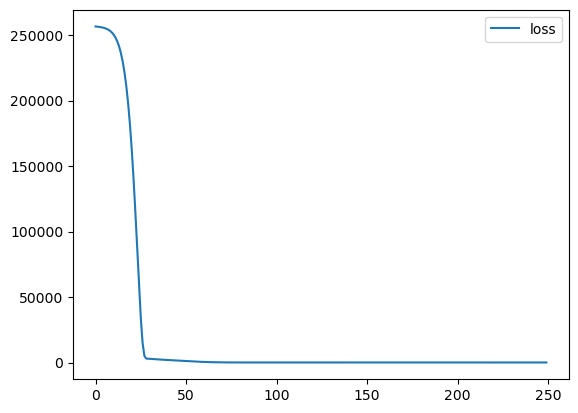

In [87]:
loss_df.plot()

In [89]:
model.evaluate(x_test,y_test,verbose=0)

29.498931884765625

In [91]:
model.evaluate(x_train,y_train,verbose=0)

30.461132049560547

In [93]:
test_predictions=model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [95]:
test_predictions

array([[403.41794],
       [620.7978 ],
       [589.5114 ],
       [569.6976 ],
       [364.9154 ],
       [576.6168 ],
       [512.7594 ],
       [457.01492],
       [546.80786],
       [445.47195],
       [609.0905 ],
       [546.48517],
       [417.1744 ],
       [406.9876 ],
       [648.37274],
       [435.29538],
       [506.15585],
       [657.05884],
       [659.6923 ],
       [563.0206 ],
       [332.64764],
       [442.80557],
       [380.75177],
       [376.9883 ],
       [564.0817 ],
       [607.91095],
       [530.015  ],
       [425.89722],
       [652.5853 ],
       [412.16843],
       [440.60944],
       [482.9381 ],
       [436.40955],
       [678.8819 ],
       [422.79794],
       [415.77225],
       [499.65317],
       [548.02386],
       [507.4583 ],
       [393.54086],
       [615.86597],
       [414.70688],
       [601.78107],
       [443.91467],
       [499.73254],
       [579.12335],
       [666.0653 ],
       [488.1858 ],
       [317.0457 ],
       [483.23807],


In [99]:
test_predictions=pd.Series(test_predictions.reshape(300,))

In [101]:
test_predictions

0      403.417938
1      620.797791
2      589.511414
3      569.697571
4      364.915405
          ...    
295    526.687317
296    511.419464
297    606.963318
298    415.028992
299    408.988037
Length: 300, dtype: float32

In [103]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [107]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [109]:
pred_df

,Test True Y,0
0,402.296319,403.417938
1,624.156198,620.797791
2,582.455066,589.511414
3,578.588606,569.697571
4,371.224104,364.915405
...,...,...
295,525.704657,526.687317
296,502.909473,511.419464
297,612.727910,606.963318
298,417.569725,415.028992


In [127]:
pred_df.columns=['Test True Y','Model Predictions']

In [113]:
pred_df

,Test True Y,Model Predictions
0,402.296319,403.417938
1,624.156198,620.797791
2,582.455066,589.511414
3,578.588606,569.697571
4,371.224104,364.915405
...,...,...
295,525.704657,526.687317
296,502.909473,511.419464
297,612.727910,606.963318
298,417.569725,415.028992


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

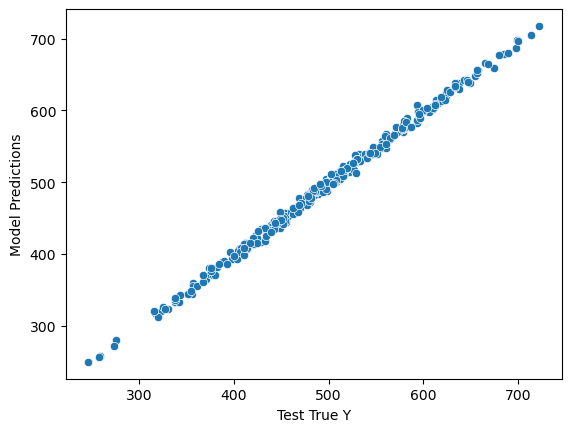

In [129]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [133]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.384752865773501

In [135]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [139]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.4312928504009665

In [141]:
new_gem=[[998,1000]]

In [145]:
new_gem=scaler.transform(new_gem)

In [147]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[417.77274]], dtype=float32)

In [149]:
from tensorflow.keras.models import load_model

In [157]:
model.save('my_gem_model.keras')

In [159]:
later_model=load_model('my_gem_model.keras')

In [161]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[417.77274]], dtype=float32)

In [165]:
# Tensor Flow Regression Code Along

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_809/4005363573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],kde=False)


<Axes: xlabel='price'>

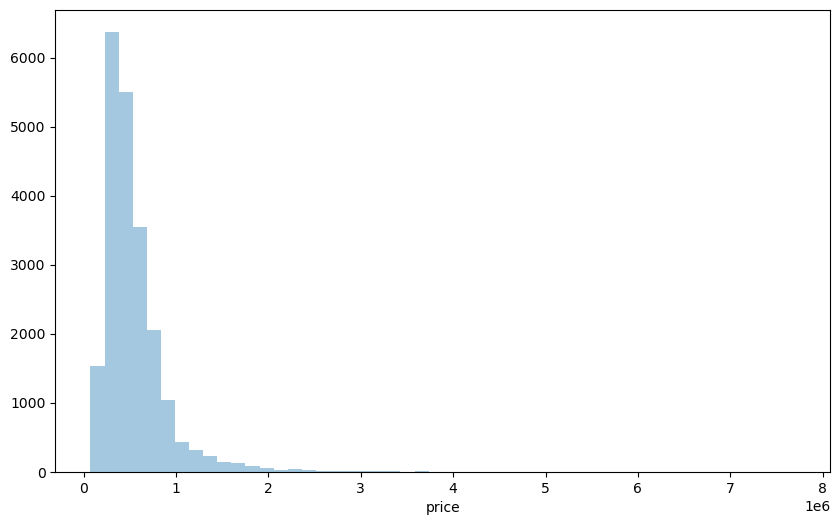

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'],kde=False)

<Axes: ylabel='count'>

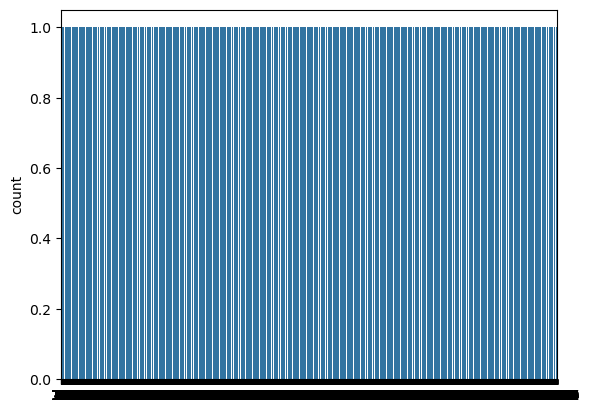

In [42]:
sns.countplot(df['bedrooms'])

In [27]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='sqft_living'>

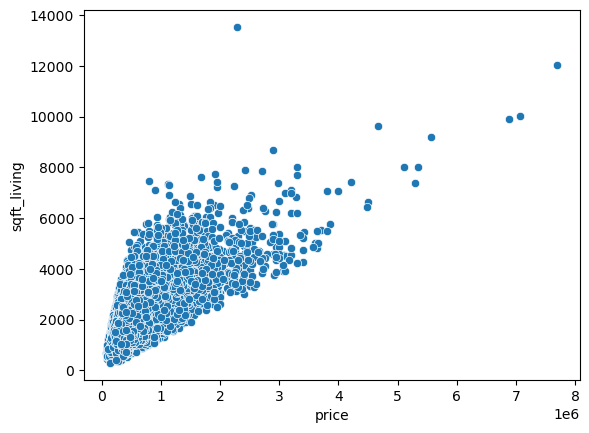

In [31]:
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='price', ylabel='bedrooms'>

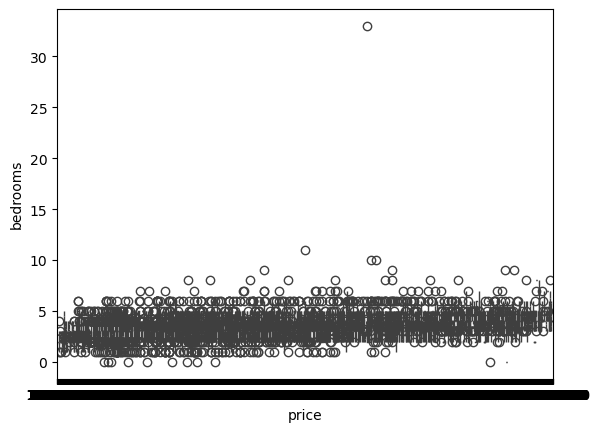

In [48]:
sns.boxplot(x='price',y='bedrooms',data=df)

<Axes: xlabel='price', ylabel='long'>

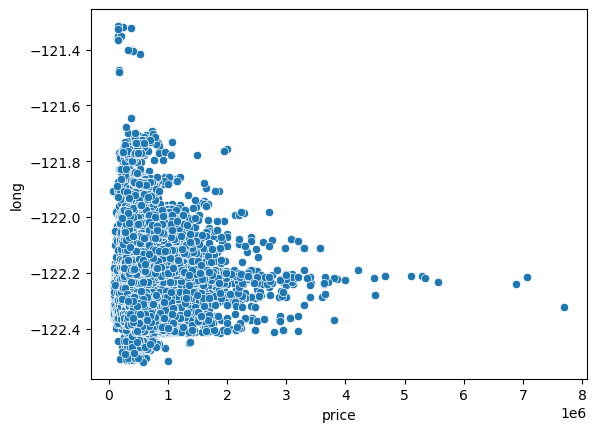

In [44]:
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='long', ylabel='lat'>

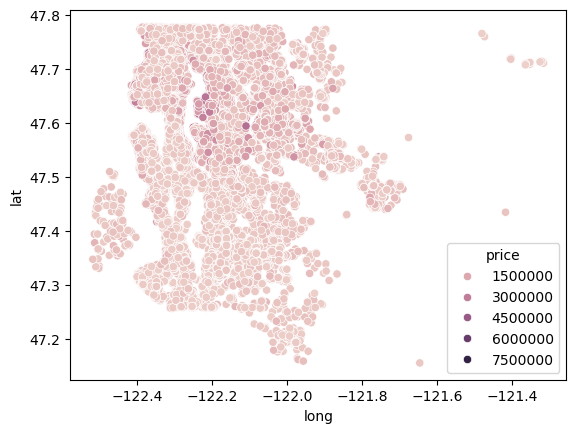

In [52]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [54]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [62]:
len(df)*0.01

216.13

In [70]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:]

In [72]:
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


<Axes: xlabel='long', ylabel='lat'>

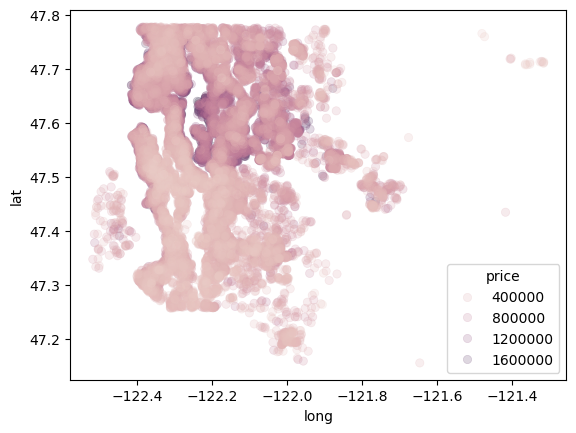

In [74]:
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,edgecolor=None,alpha=0.2,hue='price')

In [78]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='waterfront', ylabel='price'>

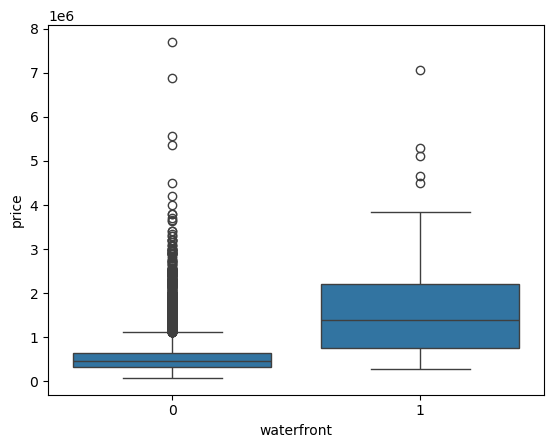

In [82]:
sns.boxplot(x='waterfront',y='price',data=df)

In [84]:
df=df.drop('id',axis=1)

In [88]:
df['date']=pd.to_datetime(df['date'])

In [90]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [106]:
def year_extraction(date):
    return date.year

In [114]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)


In [116]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: int64

In [118]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


<Axes: xlabel='month', ylabel='price'>

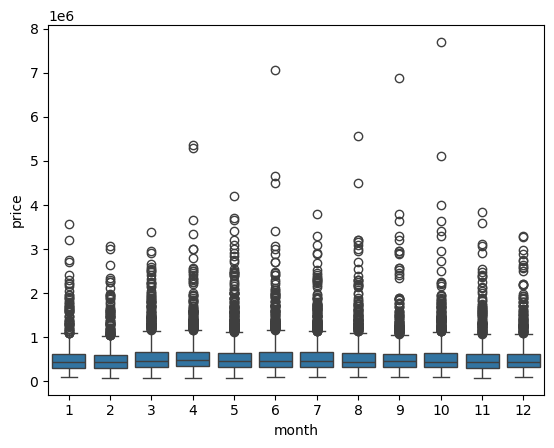

In [120]:
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='year'>

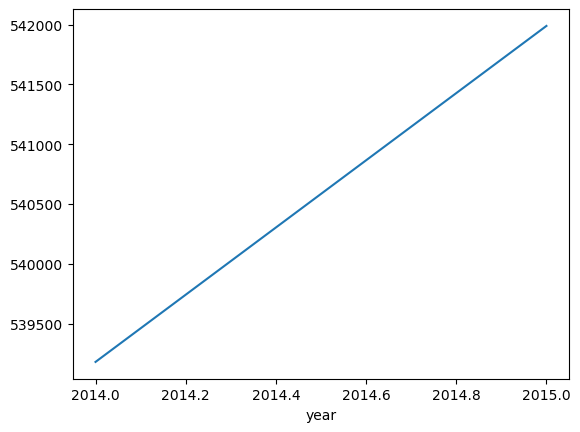

In [126]:
df.groupby('year').mean()['price'].plot()

In [128]:
df=df.drop('date',axis=1)

In [130]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [134]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [138]:
df=df.drop('zipcode',axis=1)

In [140]:
df['yr_renovated'].value_counts()	

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [144]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [148]:
x=df.drop('price',axis=1).values
y=df['price'].values

In [150]:
from sklearn.model_selection import train_test_split

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler=MinMaxScaler()

In [164]:
x_train=scaler.fit_transform(x_train)

In [168]:
x_test=scaler.transform(x_test)

In [171]:
from tensorflow.keras.models import Sequential

In [173]:
from tensorflow.keras.layers import Dense

In [175]:
x_train.shape

(15129, 19)

In [179]:
model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [183]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 216641437696.0000 - val_loss: 331708825600.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 109936517120.0000 - val_loss: 318269456384.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 93959028736.0000 - val_loss: 316343746560.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 99303931904.0000 - val_loss: 315510358016.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 85948637184.0000 - val_loss: 314200064000.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 87689216000.0000 - val_loss: 313419137024.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 97080459264.0000 - val_loss: 311750328320.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 81764360192.0000 - val_loss: 310209150976.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 84217110528.0000 - val_loss: 308389347328.0000
Epoch 10

In [187]:
loss=pd.DataFrame(model.history.history)

<Axes: >

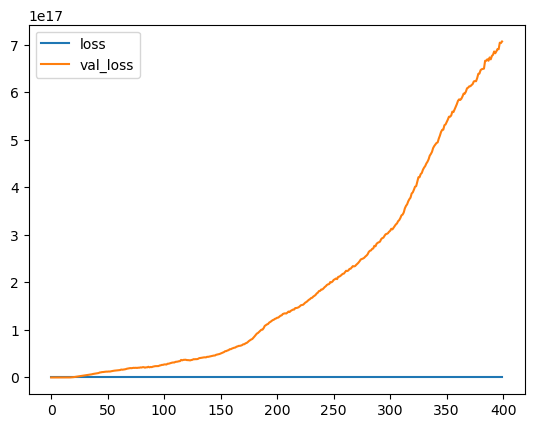

In [189]:
loss.plot()

In [195]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [197]:
predictions=model.predict(x_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step


In [201]:
np.sqrt(mean_squared_error(y_test,predictions))

840889010.8801186

In [203]:
mean_absolute_error(y_test,predictions)

840888905.3405305

In [205]:
explained_variance_score(y_test,predictions)

-0.22946881546214426

In [207]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [209]:
5.400881e+05

540088.1

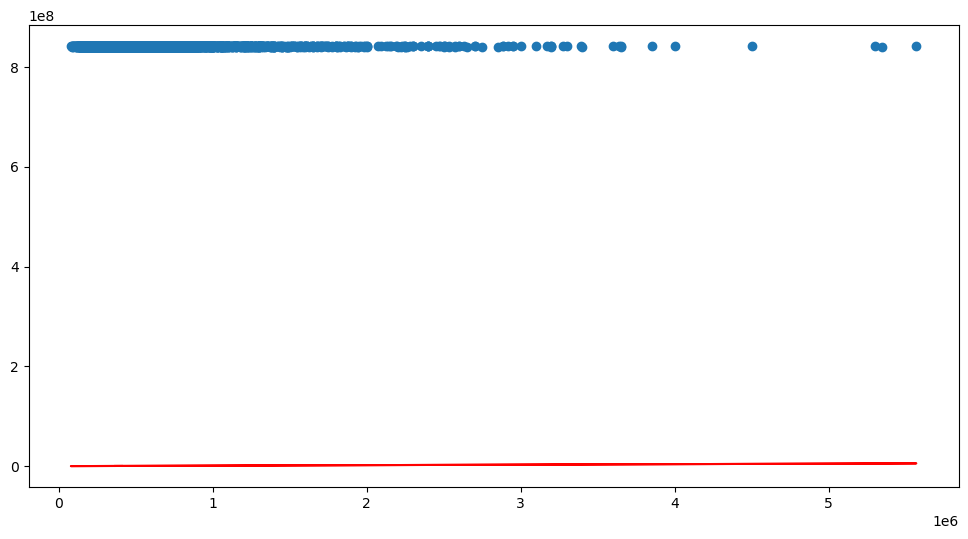

In [221]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')